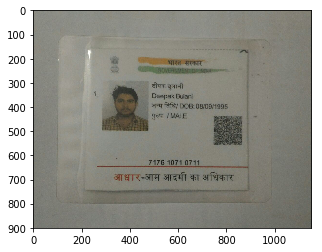

In [2]:
import cv2
import matplotlib.pyplot as plt
cv2.__version__
img = plt.imread('aadhar.jpeg')

plt.imshow(img, cmap='gray')
plt.show()


In [3]:
import cv2
import sys
import matplotlib.pyplot as plt


cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('Mouth.xml')

video_capture = cv2.VideoCapture(-1)

i=0
while i<4:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if ret == True:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30, 30),
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            for (x,y,w,h) in faces:
                cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]

                eyes = eye_cascade.detectMultiScale(roi_gray)
                mouth = mouth_cascade.detectMultiScale(roi_gray)
                
                for (mx,my,mw,mh) in mouth:
                    cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,255,0),2)
                    
                    for (ex,ey,ew,eh) in eyes:
                        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
           

            # Display the resulting frame
            cv2.imshow('video',frame)
    
            if cv2.waitKey(1) & 0xFF== ord('q'):
                break 

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()
